# Documentation

## Notebook History

**Date | Version | Author | Comments**
- 2022-01-15 | 1.0 | Andre Buser | Initial version.

## Open tasks / Last Activitites

Open tasks and/or the latest activities in this section:
- [ ] #TODO: **Complete** Data Science Ethics Checklist

## Purpose

The objective of this **stage two** notebook is to clean and prepare the population **dataset** for the EDA phase.

## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

### B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

### C. Analysis
 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

### D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

### E. Deployment
 - [ ] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*


# Setup Environment

In [1]:
!python --version

Python 3.9.7


## Install Modules

List !pip install commands for modules which are not part of the Google Colabs standard environment. For local environment, please use the provided installation files and environments.

In [2]:
#!pip install colorama # colorize output text
#!pip install missingno # for analyzing missing values
#!pip install scikit-learn

# document module versions
!pip install watermark

# required to use pickle files, protocol 2
!pip install pandas --upgrade 

## Import Modules

In [3]:
# Base libraries
import time
import datetime
import os
import sqlite3

# Scientific libraries
import numpy as np
import pandas as pd
#from empiricaldist import Cdf, Pmf

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno  # Visualize missing values

# Helper libraries
#from tqdm.notebook import tqdm, trange
#from colorama import Fore, Back, Style
import gc # garbage collection to optimize memory usage, use gc.collect()
import warnings
warnings.filterwarnings('ignore')

# Visual setup
import altair as alt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load magic commands
%load_ext watermark


## Define Parameters

In [4]:
# Paths: Local Setup
PATH_EXT = "../data/external/"
PATH_RAW = "../data/raw/"
PATH_INT = "../data/interim/"
PATH_PRO = "../data/processed/"
PATH_REP = "../reports/"
PATH_FIGS = "../reports/figures/"

In [5]:
"""
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Paths: Google Colabs Setup
PATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"
PATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"
PATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"
PATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"
PATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"
PATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"
"""

'\n# Mount Google Drive\nfrom google.colab import drive\ndrive.mount(\'/content/drive\', force_remount=True)\n\n# Paths: Google Colabs Setup\nPATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"\nPATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"\nPATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"\nPATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"\nPATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"\nPATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"\n'

In [6]:
# Set global seed
seed = 42

# Define available cpu cores
n_cpu = os.cpu_count()
print("Number of CPUs used:", n_cpu)

Number of CPUs used: 16


# Load Data

In [7]:
FILENAME = "population_by_country_p2.pkl"
data_path = os.path.join(PATH_EXT, FILENAME)
df = pd.read_pickle(data_path)


In [8]:
df.head()
df.info()

,Country,Year,Population,Yearly % Change,Urban Population
0,Afghanistan,2020,38928346,2.33 %,9904337
1,Afghanistan,2019,38041754,2.34 %,9582625
2,Afghanistan,2018,37171921,2.41 %,9273302
3,Afghanistan,2017,36296113,2.58 %,8971472
4,Afghanistan,2016,35383032,2.82 %,8670939


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4212 entries, 0 to 17
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           4212 non-null   object
 1   Year              4212 non-null   object
 2   Population        4212 non-null   object
 3   Yearly % Change   4212 non-null   object
 4   Urban Population  4212 non-null   object
dtypes: object(5)
memory usage: 197.4+ KB


In [9]:
FILENAME = "country_master_list.csv"
data_path = os.path.join(PATH_INT, FILENAME)
cml_df = pd.read_csv(data_path)

In [10]:
cml_df.head()
cml_df.info()

,country,country_label,iso3
0,AUSTRIA,0,AUT
1,BELGIUM,1,BEL
2,BULGARIA,2,BGR
3,CROATIA,3,HRV
4,CYPRUS,4,CYP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        31 non-null     object
 1   country_label  31 non-null     int64 
 2   iso3           31 non-null     object
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


# Clean Data

**Checklist:**
**General**
- [X] Lowercase the column names of the dataframe(s) to make references within the notebook(s) more straightforward and consistent
- [X] Check for consistencies (naming, writing) for all the categorical features
- [X] Create “mapping_key” column based on country+year; used to join the various datasets
- [-] **NOT REQUIRED** Encode categorical features with ordinal/label-encoding, for pattern and correlation checks; keep the base category for the exploratory analysis
- [X] Drop unused columns: keep the following years: [2021, 2022, 2019, 2020, 2018]
- [X] Check for missing values

**Dataset-specific:**
- [X] Calculate population 2021 based on average growth rate from previous years: countries 2021: "final value / initial value”
- [X] Keep only relevant columns, country, year and population
- [X] Label-encode (re-map) country: label-encoding will be done in the mapping table
- [X] Create mapping_key column: country+year
- [-] **SKIPPED** Create and assign percentile column - **just using rounded population numbers**
- [X] Only keep the countries based on the GDPR-fine dataset (as the main dataset), drop the unused/non-relevant countries
- [X] Save the result in SQLite DB-file


## Lowercase the column names

In [11]:
df.columns = df.columns.str.lower()
df

,country,year,population,yearly % change,urban population
0,Afghanistan,2020,38928346,2.33 %,9904337
1,Afghanistan,2019,38041754,2.34 %,9582625
2,Afghanistan,2018,37171921,2.41 %,9273302
3,Afghanistan,2017,36296113,2.58 %,8971472
4,Afghanistan,2016,35383032,2.82 %,8670939
...,...,...,...,...,...
13,Zimbabwe,1975,6293875,3.54 %,1215331
14,Zimbabwe,1970,5289303,3.42 %,898584
15,Zimbabwe,1965,4471177,3.43 %,644767
16,Zimbabwe,1960,3776681,3.28 %,472478


## Check for consistencies (naming, writing) and apply required cleaning and transformation steps

### country column

In [12]:
df['country'] = df['country'].str.upper()
df['country'].unique().tolist()
print('Result:\n - Align country names with country master list, .e.g. UK with UNITED KINGDOM.\n - Uppercase country names')

['AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'AMERICAN-SAMOA',
 'ANDORRA',
 'ANGOLA',
 'ANGUILLA',
 'ANTIGUA-AND-BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'ARUBA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BERMUDA',
 'BHUTAN',
 'BOLIVIA',
 'BOSNIA-AND-HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRITISH-VIRGIN-ISLANDS',
 'BRUNEI-DARUSSALAM',
 'BULGARIA',
 'BURKINA-FASO',
 'BURUNDI',
 'CABO-VERDE',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CARIBBEAN-NETHERLANDS',
 'CAYMAN-ISLANDS',
 'CENTRAL-AFRICAN-REPUBLIC',
 'CHAD',
 'CHANNEL-ISLANDS',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'COOK-ISLANDS',
 'COSTA-RICA',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'CZECHIA',
 'COTE-D-IVOIRE',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN-REPUBLIC',
 'DEMOCRATIC-REPUBLIC-OF-THE-CONGO',
 'ECUADOR',
 'EGYPT',
 'EL-SALVADOR',
 'EQUATORIAL-GUINEA',
 'ERITREA',
 'ESTONIA',
 'ETHIOPIA',
 'FAEROE-ISLANDS',


Result:
 - Align country names with country master list, .e.g. UK with UNITED KINGDOM.
 - Uppercase country names


In [13]:
# Create country lists for comparision
cml_list = cml_df['country'].unique().tolist()
df_country_list = set(df['country'].tolist())

In [14]:
cml_list

['AUSTRIA',
 'BELGIUM',
 'BULGARIA',
 'CROATIA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'ESTONIA',
 'FINLAND',
 'FRANCE',
 'GERMANY',
 'GREECE',
 'HUNGARY',
 'ICELAND',
 'IRELAND',
 'ISLE OF MAN',
 'ITALY',
 'LATVIA',
 'LIECHTENSTEIN',
 'LITHUANIA',
 'LUXEMBOURG',
 'MALTA',
 'NORWAY',
 'POLAND',
 'PORTUGAL',
 'ROMANIA',
 'SLOVAKIA',
 'SPAIN',
 'SWEDEN',
 'THE NETHERLANDS',
 'UNITED KINGDOM']

In [15]:
# Check if master country can be found in the population country list. 
# If not, we need to check the spelling/writing.
print("Check the writing of the following countries:")
count = 0
for master_country in cml_list:
    if master_country not in df_country_list:
        count += 1
        print(f"{master_country} NOT found in population country list.")

print("Count:", count)

Check the writing of the following countries:
CZECH REPUBLIC NOT found in population country list.
ISLE OF MAN NOT found in population country list.
THE NETHERLANDS NOT found in population country list.
UNITED KINGDOM NOT found in population country list.
Count: 4


In [16]:
# Rename/replace country names in population dataframe
df.replace('UK','UNITED KINGDOM', inplace=True)
df.replace('NETHERLANDS','THE NETHERLANDS', inplace=True)
df.replace('ISLE-OF-MAN','ISLE OF MAN', inplace=True)
df.replace('CZECHIA','CZECH REPUBLIC', inplace=True)


In [17]:
# Update country lists for comparision
df_country_list = set(df['country'].unique().tolist())

# Checking if master country can be found in the population country list. If not, we need to check the spelling/writing.
print("Check the writing of the following countries:")
count = 0
for master_country in cml_list:
    if master_country not in df_country_list:
        count += 1
        print(f"{master_country} NOT found in population country list.")

print("Count:", count)
assert count == 0

Check the writing of the following countries:
Count: 0


In [18]:
# Remove unwanted countries
cml_list = cml_df['country'].unique().tolist()

# Only keep countries which are listed in country master list (cml_list)
df = df[df['country'].isin(cml_list)]

### year column

In [19]:
sorted(df['year'].unique().tolist())
print('Result: All good, but remove irrelevant years later. HOWEVER, some years are missing. Average growth rate will be calculated based on years starting from 2015.')

[1955,
 1960,
 1965,
 1970,
 1975,
 1980,
 1985,
 1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

Result: All good, but remove irrelevant years later. HOWEVER, some years are missing. Average growth rate will be calculated based on years starting from 2015.


### population column

In [20]:
#sorted(df['population'].unique().tolist())
print('Result: All good. However binning should be done, later. After the 2021 population was calculated')

Result: All good. However binning should be done, later. After the 2021 population was calculated


#### Calculate and 2021 expected population


In [21]:
# Formula used: growth rate: “(final “value / initial value)”

In [22]:
# Only keeping relevant columns
df = df[['country','year','population']]
df

,country,year,population
0,AUSTRIA,2020,9006398
1,AUSTRIA,2019,8955102
2,AUSTRIA,2018,8891388
3,AUSTRIA,2017,8819901
4,AUSTRIA,2016,8747301
...,...,...,...
13,UNITED KINGDOM,1975,56152333
14,UNITED KINGDOM,1970,55573453
15,UNITED KINGDOM,1965,54240850
16,UNITED KINGDOM,1960,52370602


In [23]:
# Create list with the unique country names
country_list = df['country'].unique().tolist()

# Calculate avg. growth rate and expected population for each country
for country in country_list:
    growth_list = []
    pop_2020 = float(df[(df["country"] == country) & (df["year"] == 2020)]["population"])
    #print(pop_2020)

    for year in range(2015, 2020, 1):
        growth_rate1 = float(df[(df["country"] == country) & (df["year"] == year)]["population"])
        growth_rate2 = float(df[(df["country"] == country) & (df["year"] == (year+1))]["population"])
        #print(growth_rate2 / growth_rate1)
        growth_list.append(growth_rate2 / growth_rate1)
        #print(growth_list)
    
    population = int(pop_2020 * np.average(growth_list))

    # Add expected population for 2021 to dataframe
    df.loc[len(df.index)] = [country, 2021, population]
    
# Sort df
df.sort_values(['country','year'], inplace=True)

# Verify that for all countries the expected for 2021 has been added
print(len(country_list))
print(len(df[df['year'] == 2021]))
assert len(df[df['year'] == 2021]) == len(country_list)

31
31


In [24]:
# Relevant years for the project: [2021, 2019, 2020, 2018]
# Only keep years >= 2018
df = df[df['year'] >= 2018]

In [25]:
df

,country,year,population
2,AUSTRIA,2018,8891388
1,AUSTRIA,2019,8955102
0,AUSTRIA,2020,9006398
558,AUSTRIA,2021,9073420
2,BELGIUM,2018,11482178
...,...,...,...
580,THE NETHERLANDS,2021,17174419
2,UNITED KINGDOM,2018,67141684
1,UNITED KINGDOM,2019,67530172
0,UNITED KINGDOM,2020,67886011


In [26]:
#df["population"].min()
#df["population"].max()

# Categorical range: 80000 to 90000000
#(90000000 - 80000) / 10
#population_cat_bins = np.linspace(80000,90000000,11)
#population_labels = np.linspace(80000,90000000,10)
#df['population_cut'] = pd.cut(df['population'], bins=population_cat_bins, labels=population_labels)



In [27]:
# Binning
df['population_cat'] = df['population'].round(-5)

df['population_cat2'] = pd.qcut(df['population'], q=10, labels=False, precision=0) # new binning approach, maybe the correlation coeff. improves
df['population_cat2'] = df['population_cat2'].astype(float)

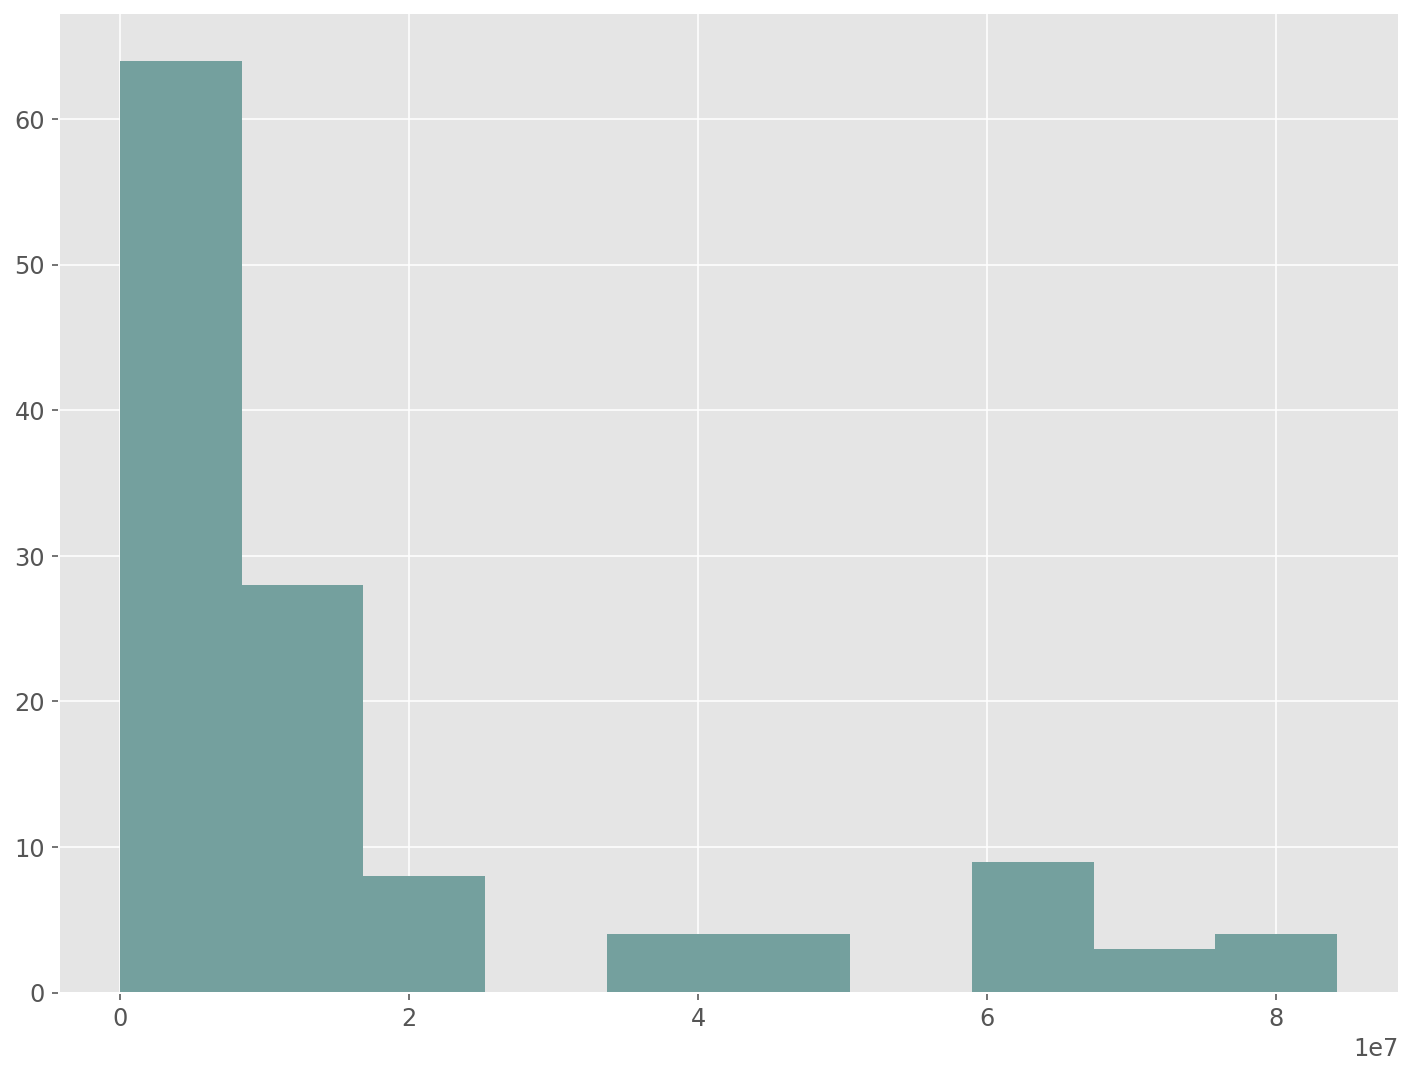

In [28]:
df['population_cat'].hist();

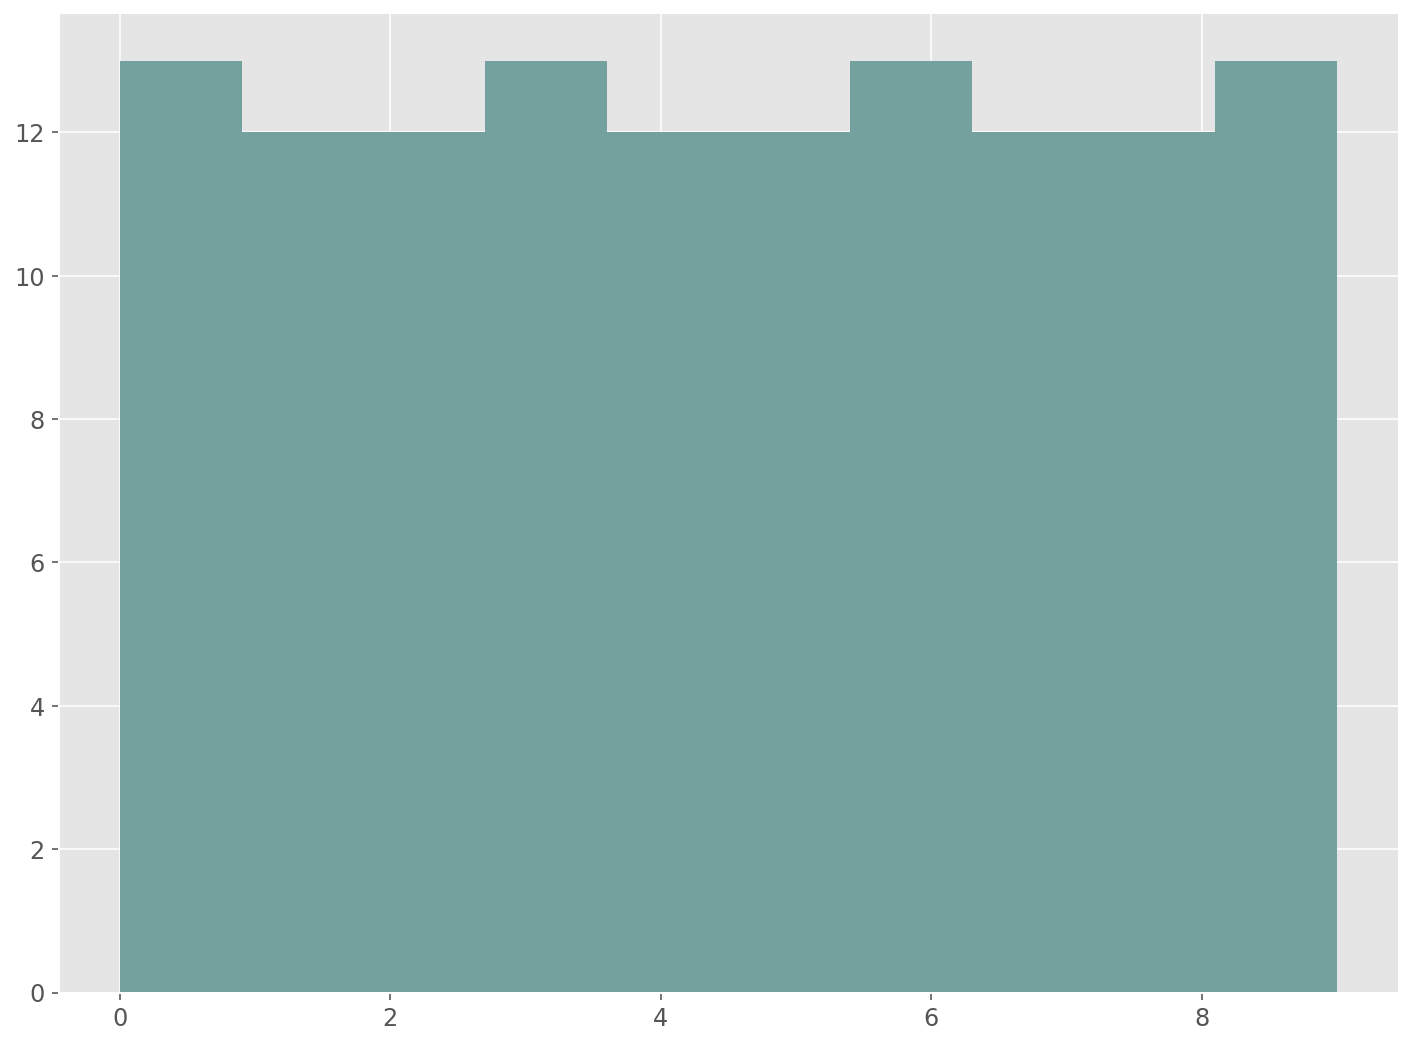

In [29]:
df['population_cat2'].hist();

In [30]:
df.shape

(124, 5)

## Create mapping_key column

In [31]:
df['mapping_key'] = df['country'].str.strip()+"-"+df['year'].astype(str)
df['mapping_key'] = df['mapping_key'].str.replace(" ","")
df

,country,year,population,population_cat,population_cat2,mapping_key
2,AUSTRIA,2018,8891388,8900000,5.0,AUSTRIA-2018
1,AUSTRIA,2019,8955102,9000000,5.0,AUSTRIA-2019
0,AUSTRIA,2020,9006398,9000000,5.0,AUSTRIA-2020
558,AUSTRIA,2021,9073420,9100000,5.0,AUSTRIA-2021
2,BELGIUM,2018,11482178,11500000,7.0,BELGIUM-2018
...,...,...,...,...,...,...
580,THE NETHERLANDS,2021,17174419,17200000,7.0,THENETHERLANDS-2021
2,UNITED KINGDOM,2018,67141684,67100000,9.0,UNITEDKINGDOM-2018
1,UNITED KINGDOM,2019,67530172,67500000,9.0,UNITEDKINGDOM-2019
0,UNITED KINGDOM,2020,67886011,67900000,9.0,UNITEDKINGDOM-2020


## Add country labels

In [32]:
df = df.merge(cml_df, on='country')
df

,country,year,population,population_cat,population_cat2,mapping_key,country_label,iso3
0,AUSTRIA,2018,8891388,8900000,5.0,AUSTRIA-2018,0,AUT
1,AUSTRIA,2019,8955102,9000000,5.0,AUSTRIA-2019,0,AUT
2,AUSTRIA,2020,9006398,9000000,5.0,AUSTRIA-2020,0,AUT
3,AUSTRIA,2021,9073420,9100000,5.0,AUSTRIA-2021,0,AUT
4,BELGIUM,2018,11482178,11500000,7.0,BELGIUM-2018,1,BEL
...,...,...,...,...,...,...,...,...
119,THE NETHERLANDS,2021,17174419,17200000,7.0,THENETHERLANDS-2021,29,NLD
120,UNITED KINGDOM,2018,67141684,67100000,9.0,UNITEDKINGDOM-2018,30,GBR
121,UNITED KINGDOM,2019,67530172,67500000,9.0,UNITEDKINGDOM-2019,30,GBR
122,UNITED KINGDOM,2020,67886011,67900000,9.0,UNITEDKINGDOM-2020,30,GBR


# Save Cleaned DataFrame

In [33]:
# Reordering columns
df = df[['mapping_key','country','year','population', 'population_cat', 'population_cat2', 'country_label']]
df

,mapping_key,country,year,population,population_cat,population_cat2,country_label
0,AUSTRIA-2018,AUSTRIA,2018,8891388,8900000,5.0,0
1,AUSTRIA-2019,AUSTRIA,2019,8955102,9000000,5.0,0
2,AUSTRIA-2020,AUSTRIA,2020,9006398,9000000,5.0,0
3,AUSTRIA-2021,AUSTRIA,2021,9073420,9100000,5.0,0
4,BELGIUM-2018,BELGIUM,2018,11482178,11500000,7.0,1
...,...,...,...,...,...,...,...
119,THENETHERLANDS-2021,THE NETHERLANDS,2021,17174419,17200000,7.0,29
120,UNITEDKINGDOM-2018,UNITED KINGDOM,2018,67141684,67100000,9.0,30
121,UNITEDKINGDOM-2019,UNITED KINGDOM,2019,67530172,67500000,9.0,30
122,UNITEDKINGDOM-2020,UNITED KINGDOM,2020,67886011,67900000,9.0,30


In [34]:
FILENAME = "population_by_country-CLEANED_p2.pkl"
data_path = os.path.join(PATH_INT, FILENAME)
#df.to_pickle(data_path, protocol=2)

In [35]:
# Saving cleaned dataset as csv to allow quick reviews
FILENAME = "population_by_country-CLEANED.csv"
data_path = os.path.join(PATH_INT, FILENAME)
df.to_csv(data_path, index=False)

In [36]:
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
df.to_sql("POP", con, index=False, if_exists="replace")
con.close()

124

# Watermark

In [37]:
%watermark

Last updated: 2022-01-23T23:13:31.628950+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.30.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [38]:
%watermark --iversions

altair    : 4.1.0
missingno : 0.5.0
matplotlib: 3.5.0
seaborn   : 0.11.2
numpy     : 1.21.4
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]
sqlite3   : 2.6.0
pandas    : 1.4.0



-----
